In [5]:
#include("PreDecoupageFonction.jl")
#include("include_Approx_lin_27_juin.jl")
#include("exactPiece.jl")
using GeneralizedGenerated
using Roots
using Calculus
using GeneralizedGenerated

include("exactPiece.jl")
#include("LinA.jl")
include("strucDef.jl")
include("convexConcaveSplit.jl")
include("CorridorFromInfo.jl")
include("Linearize Dispatch.jl")

LoadError: LoadError: UndefVarError: dataError not defined
in expression starting at C:\Users\julie\stage ete 2018\mcndstage\codes\Julia\Version la plus recente\version 1.0\temp dispatch\LinA\src\ORourke.jl:5

In [6]:
function exactLin(expr_fct::Expr,x1::Real,x2::Real, e::ErrorType; bounding = Best() ::BoundingType, 
                    ConcavityChanges = [Inf]::Array{Float64,1} )
    if x1 >= x2
        return Float64[]
    end
   
    
    if ConcavityChanges[1] == Inf
        ConcavityChanges = decoupageConvavite(x1,x2,expr_fct)
    end
    ConcavityChanges = [x1;ConcavityChanges;x2] 
    ConcavityChanges = sort(unique(ConcavityChanges)) # make sure that the bounds are there
    pwl = Array{LinearPiece}(undef, 0)
    cor = corridorFromInfo(x1, x2,expr_fct, e, bounding)[3:end-1]
    
    x2Temp = -1
    i=1
    while x1 < x2
        i = searchsortedfirst(ConcavityChanges,x1)
        ConcavityChanges[i] == x1 ? x2Temp = ConcavityChanges[i+1] : x2Temp = ConcavityChanges[i]
        println(x1,"  ",x2Temp)
        pwl = [pwl;Linearize(expr_fct, x1, x2Temp, e,bounding = bounding,ConcavityChanges=[] )] 
        pwl[end].xMax == x2 && break
        println(pwl)
        println("hello") 
        pwl[end] = exactPiece(pwl[end].xMin,x2,cor...)
        println(pwl,"\n\n\n")
        x1 = pwl[end].xMax
    end
    return pwl
end

UndefVarError: UndefVarError: ErrorType not defined

In [7]:
exactLin(:(x^3),-3.0,3.0,Absolute(3))

UndefVarError: UndefVarError: Absolute not defined

In [57]:
typeof(Absolute(3)) <: ErrorType

true

In [14]:
LinA.decoupageConvavite(-3.0,3.0,:(x^3))

1-element Array{Float64,1}:
 0.0

In [2]:
using LinA

In [4]:
Linearize(:(x^3), -3, 3, Absolute(3))

4-element Array{LinA.LinearPiece,1}:
 LinA.LinearPiece(-3.0, -1.0089536445869933, 13.044848390686356, 15.13454517205907, LinA.var"#1#2"{Float64,Float64}(13.044848390686356, 15.13454517205907))
 LinA.LinearPiece(-1.0089536445869933, 0.0, -4.928767413518695, -3.0, LinA.var"#1#2"{Float64,Float64}(-4.928767413518695, -3.0))                           
 LinA.LinearPiece(0.0, 2.498049532966813, 6.240251469155712, -3.0, LinA.var"#1#2"{Float64,Float64}(6.240251469155712, -3.0))                               
 LinA.LinearPiece(2.498049532966813, 3.0, 34.68777075712715, -74.06331227138145, LinA.var"#1#2"{Float64,Float64}(34.68777075712715, -74.06331227138145))   

In [4]:
function joinPwl(Pwl1,Pwl2,underOver)
    
    if underOver
        return ( [Pwl1[1];Pwl2[1]], [Pwl1[2];Pwl2[2]] )
        
    else
        return [Pwl1 ; Pwl2]
    end
    
end

joinPwl (generic function with 1 method)

In [5]:
function underOverFct(expr_fnc::Expr,relative, absolute, epsilon, delta)
    #this dosent work if derivative are involve (abs is problematic)
   @eval f(x) = $expr_fnc
    
    if relative
        return (x -> f(x) + epsilon/100 * abs(f(x)), x -> f(x) - epsilon/100 * abs(f(x)))
    end
    if absolute
        return (x -> f(x) + delta, x -> f(x) - delta )
    end
    
end

underOverFct (generic function with 1 method)

In [98]:
pwl = exactLin(:((sqrt(x))*(sin(x))+x), 1, 5, Absolute(0.32))


1  3.4203854894568733
LinearPiece[LinearPiece(1, 2.8519378245016647, 0.8060828093467353, 1.3553881754611612, var"#399#400"{Float64,Float64}(0.8060828093467353, 1.3553881754611612)), LinearPiece(2.8519378245016647, 3.4203854894568733, -1.8697495072970394, 8.986695571321457, var"#399#400"{Float64,Float64}(-1.8697495072970394, 8.986695571321457))]
hello
LinearPiece[LinearPiece(1, 2.8519378245016647, 0.8060828093467353, 1.3553881754611612, var"#399#400"{Float64,Float64}(0.8060828093467353, 1.3553881754611612)), LinearPiece(2.8519378245016647, 5.0, -0.22760641824161798, 3.689671325785885, var"#383#384"{Array{Float64,1}}([-0.22760641824161798, 3.689671325785885]))]





2-element Array{LinearPiece,1}:
 LinearPiece(1, 2.8519378245016647, 0.8060828093467353, 1.3553881754611612, var"#399#400"{Float64,Float64}(0.8060828093467353, 1.3553881754611612))       
 LinearPiece(2.8519378245016647, 5.0, -0.22760641824161798, 3.689671325785885, var"#383#384"{Array{Float64,1}}([-0.22760641824161798, 3.689671325785885]))

┌ Info: Precompiling LinA [38532ac0-09d5-11ea-3c85-f704e148a11f]
└ @ Base loading.jl:1273


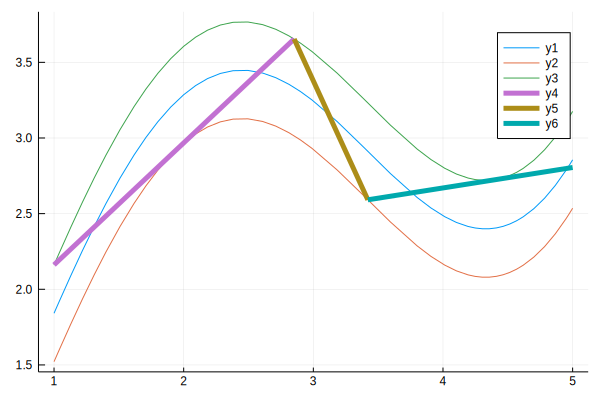

In [101]:
using LinA
pwl  = Linearize(:((sqrt(x))*(sin(x))+x), 1, 5, Absolute(0.32))

fct(x) = sqrt(x)*(sin(x))+x
graph = plot(fct ,1.0,5.0)
plot!(graph, x -> fct(x)-0.32 ,1.0,5.0)
plot!(graph, x -> fct(x)+0.32 ,1.0,5.0)

for i in pwl
    plot!(graph,x-> i.fct(x),i.xMin,i.xMax,w=5) 
end

graph

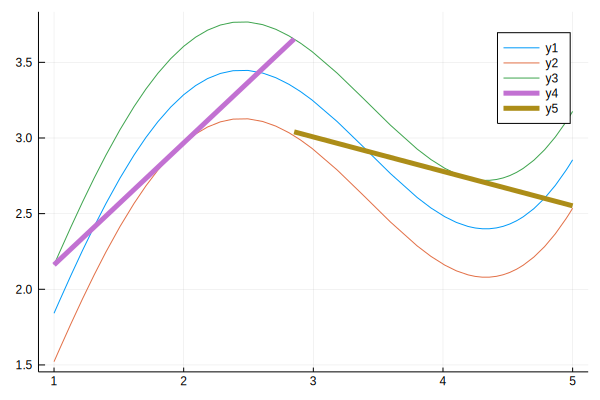

In [99]:
using Plots

fct(x) = sqrt(x)*(sin(x))+x
graph = plot(fct ,1.0,5.0)
plot!(graph, x -> fct(x)-0.32 ,1.0,5.0)
plot!(graph, x -> fct(x)+0.32 ,1.0,5.0)

for i in pwl
    plot!(graph,x-> i.fct(x),i.xMin,i.xMax,w=5) 
end

graph

In [100]:
pwl

2-element Array{LinearPiece,1}:
 LinearPiece(1, 2.8519378245016647, 0.8060828093467353, 1.3553881754611612, var"#399#400"{Float64,Float64}(0.8060828093467353, 1.3553881754611612))       
 LinearPiece(2.8519378245016647, 5.0, -0.22760641824161798, 3.689671325785885, var"#383#384"{Array{Float64,1}}([-0.22760641824161798, 3.689671325785885]))

In [ ]:
pwl[2]

In [69]:
decoupageConvavite(1,5,:((sqrt(x))*(sin(x))+x))

1-element Array{Float64,1}:
 3.4203854894568733

In [71]:
?searchsortedfirst

search: searchsortedfirst searchsortedlast searchsorted



```
searchsortedfirst(a, x; by=<transform>, lt=<comparison>, rev=false)
```

Return the index of the first value in `a` greater than or equal to `x`, according to the specified order. Return `length(a) + 1` if `x` is greater than all values in `a`. `a` is assumed to be sorted.

# Examples

```jldoctest
julia> searchsortedfirst([1, 2, 4, 5, 5, 7], 4) # single match
3

julia> searchsortedfirst([1, 2, 4, 5, 5, 7], 5) # multiple matches
4

julia> searchsortedfirst([1, 2, 4, 5, 5, 7], 3) # no match, insert in the middle
3

julia> searchsortedfirst([1, 2, 4, 5, 5, 7], 9) # no match, insert at end
7

julia> searchsortedfirst([1, 2, 4, 5, 5, 7], 0) # no match, insert at start
1
```


In [82]:
fct +3

MethodError: MethodError: no method matching +(::typeof(fct), ::Int64)
Closest candidates are:
  +(::Any, ::Any, !Matched::Any, !Matched::Any...) at operators.jl:529
  +(!Matched::Complex{Bool}, ::Real) at complex.jl:297
  +(!Matched::Missing, ::Number) at missing.jl:115
  ...